In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization,Conv2D,MaxPooling2D,Activation,Dropout,Dense,Flatten,Input,Bidirectional,LSTM,MaxPool2D
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import concatenate
from sklearn.model_selection import train_test_split
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, balanced_accuracy_score, classification_report
import keras
import tensorflow as tf
from keras.layers import Dense, SimpleRNN, LSTM, TimeDistributed, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.show()

In [ ]:
import pandas as pd
df=pd.read_csv('C:\\Users\\singl\\OneDrive\\Documents\\MATLAB\\frontend\\G_TRAIN_LA19.csv')
df

In [ ]:
X = df.iloc[:,0:42].values
y = df.iloc[:,-1].values
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
y=y.astype(int)

In [ ]:
X.shape

In [108]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [141]:
X=X.reshape(216636  //42,42,1)

In [142]:
import numpy as np
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [78]:
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [143]:
regressor = keras.models.Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (42, 1)))

#regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (67, 1)))

regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

#regressor.fit(X_train, y_train, validation_data= (X_test,y_test),epochs = 50, batch_size = 32)
regressor.fit(X, y, epochs = 5, batch_size = 10)




Epoch 1/5
516/516 [==============================] - 32s 50ms/step - loss: 0.2470 - accuracy: 0.5574
Epoch 2/5
516/516 [==============================] - 31s 60ms/step - loss: 0.1943 - accuracy: 0.6989
Epoch 3/5
516/516 [==============================] - 28s 53ms/step - loss: 0.1831 - accuracy: 0.7299
Epoch 4/5
516/516 [==============================] - 28s 53ms/step - loss: 0.1769 - accuracy: 0.7437
Epoch 5/5
516/516 [==============================] - 27s 53ms/step - loss: 0.1771 - accuracy: 0.7387


In [178]:
import pandas as pd
dtf=pd.read_csv('C:\\Users\\singl\\OneDrive\\Documents\\MATLAB\\frontend\\G_TEST_LA19.csv')
Xt = dtf.iloc[:, 0:42].values
yt = dtf.iloc[:-1].values
len(Xt),len(yt)

(10630, 10629)

In [177]:
f = open("C:\\LA\\LA\\ASVspoof2019_LA_cm_protocols\\ASVspoof2019.LA.cm.eval.trl.txt", "r")
lis = f.readlines()

In [146]:
final = []
print(len(lis))
for i in lis:
    i = i.split(" ")
    #print(i[4])
    i=i[1]+" " + (str(0) if "spoof" in i[4] else str(1))
    final.append(i)

final.sort()
rows=[]
for i in final :
    rows.append([i.split(" ")[1]])
print(len(rows))


71237
71237


In [147]:
rows = rows[0:19999]
len(rows)
a=[]
for i in rows:
    i = int(i[0])
    a.append(i)
rows
yt=a
yt

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [172]:
import numpy as np
Xt = np.reshape(Xt, (Xt.shape[0], Xt.shape[1], 1))

In [173]:
# predict_x=regressor.predict(Xt) 

# classes_x=np.argmax(predict_x,axis=1)
prediction1=regressor.predict(Xt)
prediction1=regressor.predict((Xt) > 0.5).astype("int32")

In [174]:
score=regressor.evaluate(Xt, yt)
print("%s: %.2f%%" % (regressor.metrics_names[1], score[1]*100))


ValueError: Data cardinality is ambiguous:
  x sizes: 10630
  y sizes: 10629
Make sure all arrays contain the same number of samples.

In [151]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score

# import numpy as np
# from sklearn.metrics import roc_curve

# results=confusion_matrix(yt, prediction1)
# print("confusion matrix", results)

# accuracy = accuracy_score(yt, prediction1)
# print('Accuracy: %f' % accuracy)

# precision = precision_score(yt, prediction1)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(yt, prediction1)
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(yt, prediction1)
# print('F1 score: %f' % f1)

# fpr, tpr, threshold = roc_curve(yt,prediction1, pos_label=1)
# fnr = 1 - tpr
# eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
# EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
# print(eer_threshold)
# print("EER = ", EER)

from sklearn.metrics import accuracy_score
test_acc = accuracy_score(yt, prediction1)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(classification_report(yt, prediction1))





The Accuracy for Test Set is 89.69448472423622
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     17938
           1       0.00      0.00      0.00      2061

    accuracy                           0.90     19999
   macro avg       0.45      0.50      0.47     19999
weighted avg       0.80      0.90      0.85     19999



C:\Users\singl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\singl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\singl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


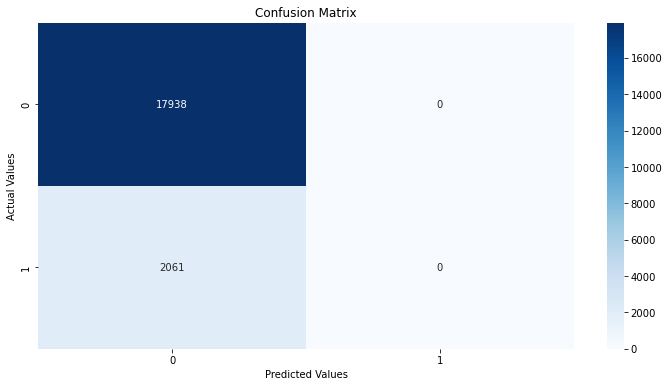

In [152]:
cm=confusion_matrix(yt, prediction1)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import numpy as np
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(yt, prediction1, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
print(eer_threshold)
print("EER = ", EER)

1
EER =  1.0
